In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
    

In [2]:
from PIL import Image
import os

directory = "E:\IIT Year 2\Sem 1\DSGP\Images"

def convert_images_to_jpg(directory):
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Try opening the image file
                    with Image.open(file_path) as img:
                        # Save the image as jpg if not already
                        if img.format != 'JPEG':
                            new_file_path = file_path.rsplit('.', 1)[0] + '.jpg'
                            img.convert('RGB').save(new_file_path, 'JPEG')
                            os.remove(file_path)  # Optional: remove original file
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

convert_images_to_jpg(directory)

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\dulin\AppData\Local\Temp\ipykernel_15456\1769544289.py:4: SyntaxWarning: invalid escape sequence '\I'
  directory = "E:\IIT Year 2\Sem 1\DSGP\Images"


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_path = "E:\IIT Year 2\Sem 1\DSGP\Images"

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\dulin\AppData\Local\Temp\ipykernel_15456\39687889.py:1: SyntaxWarning: invalid escape sequence '\I'
  data_path = "E:\IIT Year 2\Sem 1\DSGP\Images"


In [5]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels = "inferred",
    label_mode = "int",
    batch_size= 32,
    image_size = (128,128),
    shuffle = True
)

Found 3963 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names

In [7]:
def split_dataset(dataset, train = 0.7, val = 0.2):
    dataset_size = len(dataset)
    training_size = int(dataset_size*train)
    validation_size = int(dataset_size*val)

    train_dataset = dataset.take(training_size)
    validation_dataset = dataset.skip(training_size).take(validation_size)
    test_dataset = dataset.skip(training_size+validation_size)

    return train_dataset, validation_dataset, test_dataset

In [8]:
train_dataset, validation_dataset, test_dataset = split_dataset(dataset)

In [9]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


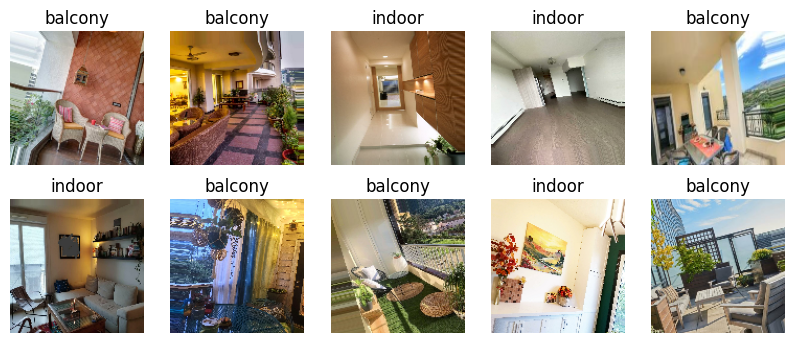

In [10]:
plt.figure(figsize=(10,4))
for image,label in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[[i]]])
        plt.axis('off')

In [25]:
from tensorflow.keras.applications.vgg16 import preprocess_input

train_dataset = train_dataset.map(lambda x,y : (preprocess_input(x),y))
validation_dataset = validation_dataset.map(lambda x,y : (preprocess_input(x),y))
test_dataset = test_dataset.map(lambda x,y : (preprocess_input(x),y))

In [26]:
pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape = (128,128,3),
    weights='imagenet',
    pooling='max',
)

for layer in pretrained_model.layers:
    layer.trainable = False

In [30]:
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [32]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 66s 752ms/step - accuracy: 0.4782 - loss: 1.4874 - val_accuracy: 0.4831 - val_loss: 0.7429
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 68s 787ms/step - accuracy: 0.5192 - loss: 0.7501 - val_accuracy: 0.4792 - val_loss: 0.6906
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 69s 790ms/step - accuracy: 0.5205 - loss: 0.7116 - val_accuracy: 0.5586 - val_loss: 0.6899
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 68s 789ms/step - accuracy: 0.4960 - loss: 0.6989 - val_accuracy: 0.5052 - val_loss: 0.6918
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 70s 802ms/step - accuracy: 0.5280 - loss: 0.6945 - val_accuracy: 0.5508 - val_loss: 0.6920
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 70s 805ms/step - accuracy: 0.4910 - loss: 0.6959 - val_accuracy: 0.5352 - val_loss: 0.6912
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 69s 799ms/step - accuracy: 0.5099 - loss: 0.6928 - val_accuracy: 0.5117 - val_loss: 0.6904
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 70s 800ms/step - accuracy: 0.5179 - loss: 0.6925 - val_accu

In [35]:
training_accuracy = history.history['accuracy'] 
print(f"Training accuracy per epoch: {training_accuracy}")

Training accuracy per epoch: [0.4960029125213623, 0.515625, 0.5116279125213623, 0.5029069781303406, 0.5178052186965942, 0.4909156858921051, 0.5061773061752319, 0.5174418687820435, 0.4909156858921051, 0.5025436282157898]


In [37]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

print("Test Loss", test_loss)
print("Test Accuracy",test_accuracy )

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 536ms/step - accuracy: 0.4930 - loss: 0.6930
Test Loss 0.6926011443138123
Test Accuracy 0.5033860206604004


In [38]:
model.save('balcony_identification_model.h5')